In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn

pd.set_option('display.max_columns', None)


In [84]:
netflix.rating.value_counts()

7    2690
6    2346
5    1083
8    1061
4     534
3     223
9     102
2      87
1       9
Name: rating, dtype: int64

In [215]:
netflix = pd.read_csv('/Users/carrie/IronHack/Project7_Group3/Data/Netflix.csv').iloc[:,1:]
netflix.dtypes

year               int64
kind               int64
rating             int64
vote             float64
runtime          float64
first_country      int64
num_language       int64
Comedy             int64
Action             int64
Musical            int64
Horror             int64
War                int64
Reality-TV         int64
Adventure          int64
Mystery            int64
Sci-Fi             int64
Film-Noir          int64
Sport              int64
Documentary        int64
Game-Show          int64
Drama              int64
Music              int64
Thriller           int64
Biography          int64
Western            int64
Family             int64
Talk-Show          int64
Short              int64
Animation          int64
Romance            int64
News               int64
History            int64
Crime              int64
Fantasy            int64
dtype: object

## check corr

In [180]:
netflix.corr()

,year,kind,rating,vote,runtime,first_country,num_language,Comedy,Action,Musical,Horror,War,Reality-TV,Adventure,Mystery,Sci-Fi,Film-Noir,Sport,Documentary,Game-Show,Drama,Music,Thriller,Biography,Western,Family,Talk-Show,Short,Animation,Romance,News,History,Crime,Fantasy
year,1.000000,0.249978,-0.170356,-0.019278,0.007941,-0.039367,-0.054485,-0.007653,0.022157,-0.081344,-0.063893,-0.082838,0.043078,-0.027785,-0.063163,-0.031778,-0.167557,0.053083,0.170380,0.020199,-0.124292,0.027539,-0.024930,0.021713,-0.106809,0.008996,-0.002556,0.048412,0.110269,-0.055388,0.018939,-0.025296,-0.023878,-0.016576
kind,0.249978,1.000000,-0.012433,-0.095764,0.012782,0.156925,-0.163643,-0.074207,-0.024956,-0.002124,0.037680,-0.077364,0.054610,-0.004627,-0.058138,0.046764,-0.032741,0.027639,0.139018,0.031487,-0.281009,0.225008,-0.073268,-0.068067,-0.020455,0.127380,0.018035,0.173528,0.219410,-0.167571,-0.025680,-0.075973,-0.133578,0.030885
rating,-0.170356,-0.012433,1.000000,0.143577,-0.000376,0.059495,0.038296,-0.094510,-0.146446,-0.003738,-0.252516,0.077283,-0.018793,-0.035654,0.061622,-0.061274,0.032766,0.005551,0.243218,-0.008683,0.083960,0.195084,-0.154528,0.090161,0.003367,-0.017497,-0.005106,0.052208,0.054393,-0.020429,0.025593,0.119062,-0.012119,0.002837
vote,-0.019278,-0.095764,0.143577,1.000000,-0.001874,0.044576,0.162959,-0.014187,0.065224,-0.006971,0.000293,0.019137,-0.012772,0.061472,0.042974,0.059502,0.002956,-0.005771,-0.083819,-0.005260,0.042164,-0.049103,0.060601,-0.012925,0.006398,-0.005725,-0.007911,-0.033085,-0.024058,-0.007802,-0.005153,-0.009184,0.047408,0.058594
runtime,0.007941,0.012782,-0.000376,-0.001874,1.000000,0.009822,0.011648,0.015065,0.011264,-0.000984,-0.012389,-0.006696,0.019215,0.001126,0.002096,0.003403,0.003211,0.016872,-0.013643,-0.011967,-0.005542,-0.011343,0.006036,-0.003198,-0.009640,0.017431,-0.011715,-0.006472,0.010544,0.005853,0.000409,0.008672,0.017876,0.001973
first_country,-0.039367,0.156925,0.059495,0.044576,0.009822,1.000000,-0.153260,-0.004986,-0.141662,-0.024704,0.000213,-0.041852,0.016796,-0.002778,0.016727,-0.018259,0.036233,0.043809,0.178918,0.009378,-0.182036,0.076576,-0.054799,0.046634,0.064312,0.061771,0.027175,0.038068,-0.066739,-0.117335,0.018837,0.025093,-0.041559,-0.030628
num_language,-0.054485,-0.163643,0.038296,0.162959,0.011648,-0.153260,1.000000,0.011832,0.072322,-0.021053,-0.066413,0.188332,-0.028468,0.047131,-0.015320,-0.056266,0.018824,-0.026091,-0.102524,-0.011990,0.130391,-0.061918,0.039928,0.011252,-0.001701,-0.079650,-0.018520,-0.056871,-0.062174,0.075830,-0.020846,0.051344,0.053034,-0.054334
Comedy,-0.007653,-0.074207,-0.094510,-0.014187,0.015065,-0.004986,0.011832,1.000000,-0.042058,0.100885,-0.083464,-0.088333,-0.013972,0.069467,-0.108846,-0.002993,-0.036144,0.010345,-0.199533,-0.013090,-0.126147,-0.043926,-0.182327,-0.122983,-0.003681,0.147911,0.038890,0.000737,0.134133,0.151116,-0.015830,-0.109735,-0.052786,0.077762
Action,0.022157,-0.024956,-0.146446,0.065224,0.011264,-0.141662,0.072322,-0.042058,1.000000,-0.052715,-0.019696,0.042258,-0.016262,0.298794,-0.030097,0.264366,-0.014764,0.007806,-0.186095,-0.005691,-0.023766,-0.155523,0.219389,-0.082201,-0.001285,-0.037386,-0.019207,-0.053955,0.179716,-0.069340,-0.011472,-0.024836,0.141165,0.121783
Musical,-0.081344,-0.002124,-0.003738,-0.006971,-0.000984,-0.024704,-0.021053,0.100885,-0.052715,1.000000,-0.045634,-0.039007,-0.013381,0.062651,-0.054028,-0.044131,-0.011365,-0.022398,-0.077183,-0.006679,0.000773,0.500738,-0.068001,-0.032437,0.007877,0.197863,-0.008333,0.017033,0.127657,0.127829,-0.004977,-0.018034,-0.060452,0.075689


In [181]:
# Create correlation matrix

def get_redundant_pairs():
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = netflix.columns
    for i in range(0, netflix.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations():
    au_corr = netflix.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs()
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:5]

print("\nTop Absolute Correlations")
print(get_top_abs_correlations())


Top Absolute Correlations
Musical      Music        0.500738
Reality-TV   Game-Show    0.443459
Documentary  Drama        0.372047
Animation    Fantasy      0.353859
Thriller     Crime        0.347249
dtype: float64


In [182]:
# the correaltion is not super high, we could keep all columns

In [216]:
X=netflix.drop('rating',axis=1)
y=netflix.rating

In [217]:
X.shape

(8135, 33)

In [218]:
y.shape

(8135,)

## feature selection

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# SelectFromModel: Meta-transformer for selecting features based on importance weights.
SFM = SelectFromModel(estimator=RandomForestClassifier())
s=SFM.fit(X, y)

In [186]:
n_features = s.transform(X).shape[1]
n_features

6

In [187]:
feature_idx = s.get_support()
feature_name = X.columns[feature_idx]
feature_name 

Index(['year', 'kind', 'vote', 'runtime', 'first_country', 'num_language'], dtype='object')

In [68]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [77]:
rfe_selector = RFE(estimator=RandomForestClassifier(),n_features_to_select = 6, step = 1) #more step, less iteration
m=rfe_selector.fit(X, y)
X.columns[m.get_support()]
print("Num Features: %s" % (m.n_features_))
print("Selected Features: %s" % (m.support_))
print("Feature Ranking: %s" % (m.ranking_))

Num Features: 6
Selected Features: [ True  True  True  True  True  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False]
Feature Ranking: [ 1  1  1  1  1  1  3  5 22 14 19 24  2 16 10 25 18  4 27  6  7 12 17 23
 11 26 20 15  9 28 21  8 13]


In [76]:
X.loc[:, m.support_].columns

Index(['year', 'vote', 'runtime', 'first_country'], dtype='object')

## Hyper Tunning

In [208]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

In [171]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

parameter_grid = {'n_estimators':np.arange(5,200,5), 'max_features':["auto", "sqrt", "log2"], 'criterion':["gini", "entropy"]}

#scoring: the goal, to fing the optimal no. of hyperparam n_estimators(no. of tree) for RandomForestClassifier model
grid_search = GridSearchCV(RandomForestClassifier(random_state=0),
                           parameter_grid,cv=5, scoring="accuracy",verbose=1,n_jobs=-1
                           )
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 234 candidates, totalling 1170 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195])},
             scoring='accuracy', verbose=1)

In [173]:
grid_search.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 195}

In [174]:
grid_search.best_score_

0.4171554859284955

In [175]:
rand_search = RandomizedSearchCV(RandomForestClassifier(random_state=0),
                           {
                              'n_estimators':np.arange(5,200,5)
                            
                            },cv=5, scoring="accuracy",verbose=1,n_jobs=-1
                           )
rand_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'n_estimators': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195])},
                   scoring='accuracy', verbose=1)

In [177]:
rand_search.best_params_

{'n_estimators': 195}

In [176]:
rand_search.best_score_

0.4171554859284955

## Train model & accuracy

In [188]:
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

The accuracy of the Random Forest Classifier is: 39.189189189189186 %

The classification report for Random Forest Classifier is:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.20      0.08      0.12        12
           3       0.17      0.08      0.11        25
           4       0.22      0.13      0.16        55
           5       0.18      0.11      0.14       118
           6       0.39      0.47      0.43       235
           7       0.46      0.57      0.51       240
           8       0.42      0.36      0.39       119
           9       0.80      0.44      0.57         9

    accuracy                           0.39       814
   macro avg       0.32      0.25      0.27       814
weighted avg       0.37      0.39      0.37       814



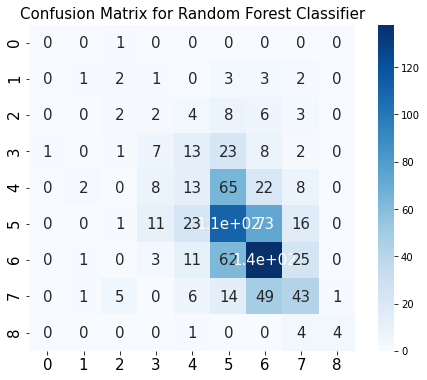

In [189]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion= 'gini', max_features='auto', n_estimators=195)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
acc_rfc = rfc.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')
generate_results(rfc, y_pred, 'Random Forest Classifier')

In [222]:
x_train09, x_test09, y_train09, y_test09 = train_test_split(X, y, test_size=0.1, random_state=5)

In [223]:
rfc2 = RandomForestClassifier(criterion= 'gini', max_features='auto', n_estimators=195)
model09 = rfc2.fit(x_train09, y_train09)

In [224]:
y_pred09 = model09.predict(x_train09)
sklearn.metrics.r2_score(y_train09, y_pred09)

0.9999226459730504

In [225]:
y_test09_pred = model09.predict(x_test09)
sklearn.metrics.r2_score(y_test09, y_test09_pred)

0.3918610992820374

The accuracy of the Random Forest Classifier is: 53.19410319410319 %

The classification report for Random Forest Classifier is:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00        11
           3       0.06      0.04      0.05        24
           4       0.03      0.02      0.02        56
           5       0.15      0.09      0.11       122
           6       0.28      0.34      0.31       238
           7       0.31      0.40      0.35       254
           8       0.14      0.11      0.12        99
           9       0.00      0.00      0.00        10

    accuracy                           0.25       814
   macro avg       0.12      0.13      0.12       814
weighted avg       0.23      0.25      0.24       814



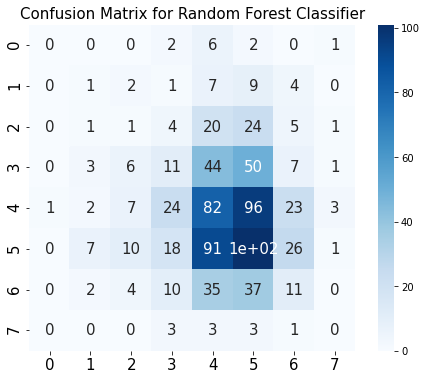

In [229]:
from sklearn.ensemble import RandomForestClassifier

y_pred2 = rfc2.predict(x_test09)
acc_rfc2 = rfc2.score(x_test09, y_test09)
print('The accuracy of the Random Forest Classifier is:', acc_rfc2 * 100, '%')
generate_results(rfc2, y_pred2, 'Random Forest Classifier')

In [230]:
y_test09_pred = rfc2.predict(x_test09)
sklearn.metrics.r2_score(y_test09, y_test09_pred)

0.3918610992820374

### Regularization

In [194]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train09 = sc.fit_transform(x_train09)
x_test09 = sc.transform(x_test09)

In [202]:
rfc2 = RandomForestClassifier(criterion= 'gini', max_features='auto', n_estimators=195)
model09 = rfc2.fit(x_train09, y_train09)

y_pred09 = model09.predict(x_train09)
sklearn.metrics.r2_score(y_train09, y_pred09)

0.9999226459730504

In [203]:
y_test09_pred = model09.predict(x_test09)
sklearn.metrics.r2_score(y_test09, y_test09_pred)

0.42986978057691005

### Training on the full data and evaluation on test data

In [220]:
rfc3 = RandomForestClassifier(criterion= 'gini', max_features='auto', n_estimators=195)
model3 = rfc3.fit(X, y)

In [221]:
y_test_pred2 = model3.predict(x_test)
sklearn.metrics.r2_score(y_test, y_test_pred2)

ValueError: X has 6 features, but DecisionTreeClassifier is expecting 33 features as input.

In [212]:
acc_rfc3 = rfc3.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc3 * 100, '%')
generate_results(rfc3, y_pred, 'Random Forest Classifier')

ValueError: X has 6 features, but DecisionTreeClassifier is expecting 33 features as input.

In [211]:

n_netflix = netflix[['year', 'kind', 'vote', 'runtime', 'first_country', 'num_language','rating']]
X1=n_netflix.drop('rating',axis=1)
y1=n_netflix.rating
x_train, x_test, y_train, y_test= train_test_split(X1, y1, test_size=0.1)

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

#scoring: the goal, to fing the optimal no. of hyperparam n_estimators(no. of tree) for RandomForestClassifier model
grid_search = GridSearchCV(RandomForestClassifier(random_state=0),
                           {
                              'n_estimators':np.arange(5,400,5)
                            # cv=> split into 5 group and execute cross validation, when cv increase, more time-consuming
                            },cv=5, scoring="accuracy",verbose=1,n_jobs=-1
                           )
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 79 candidates, totalling 395 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'n_estimators': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195,
       200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260,
       265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325,
       330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390,
       395])},
             scoring='accuracy', verbose=1)

In [172]:
grid_search.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 195}

In [169]:
grid_search.best_score_

0.41824828885283205

The accuracy of the Random Forest Classifier is: 42.7781192378611 %

The classification report for Random Forest Classifier is:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.29      0.10      0.15        20
           3       0.26      0.11      0.16        44
           4       0.17      0.10      0.13       107
           5       0.32      0.23      0.27       208
           6       0.42      0.48      0.45       456
           7       0.49      0.57      0.53       559
           8       0.43      0.37      0.40       214
           9       0.91      0.56      0.69        18

    accuracy                           0.43      1627
   macro avg       0.36      0.28      0.31      1627
weighted avg       0.41      0.43      0.41      1627



/Users/carrie/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/carrie/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/carrie/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



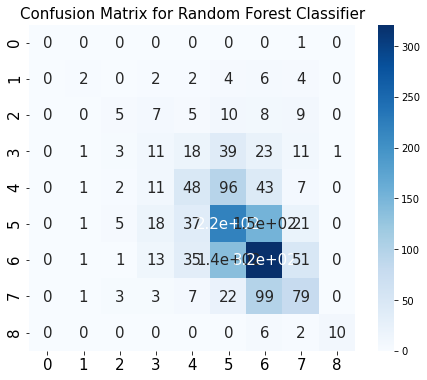

In [166]:
rfc = RandomForestClassifier(n_estimators=195)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
acc_rfc = rfc.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')
generate_results(rfc, y_pred, 'Random Forest Classifier')